In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import os
import matplotlib.pyplot as plt


In [3]:
Credit_card_data = pd.read_csv('/content/creditcard.csv')

In [4]:
Credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
Credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0
5973,6645,-0.535272,-0.132299,2.180041,1.018303,-1.498819,0.529570,0.420147,0.045445,1.543919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [7]:
Credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
Credit_card_data['Class'].value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

In [11]:
legit = Credit_card_data[Credit_card_data.Class == 0]
fraud = Credit_card_data[Credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(5970, 31)
(3, 31)


In [13]:
legit.Amount.describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [15]:
Credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2677.40201,-0.264965,0.285625,0.844580,0.102656,0.000958,0.195420,0.018542,-0.039195,0.397472,...,0.055426,-0.043268,-0.161540,-0.036683,0.028985,0.089890,-0.040132,0.025238,0.006163,64.965707
1.0,1780.00000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


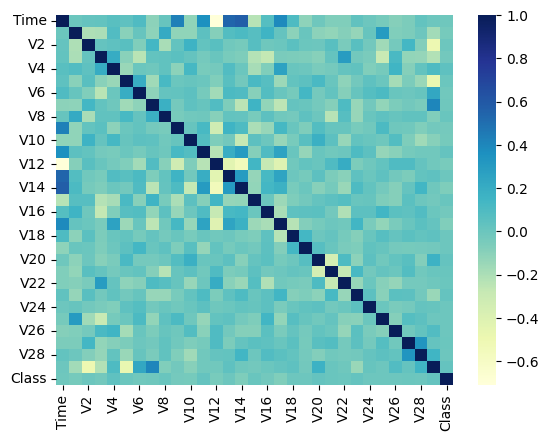

In [17]:
import seaborn as sns

sns.heatmap(Credit_card_data.corr(), cmap="YlGnBu")
plt.show()

In [18]:
legit_sample = legit.sample(n=492)

In [19]:
new_dataset = pd.concat([legit_sample,fraud], axis=0)

In [20]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2198,1719,1.169806,0.188238,0.400703,1.394425,-0.179357,-0.190393,0.037884,0.007890,0.350622,...,-0.107995,-0.087074,-0.054819,0.083982,0.650956,-0.311201,0.037833,0.014719,5.64,0.0
5772,6164,-0.412996,1.090898,1.508138,0.666083,0.206779,-0.821867,0.881818,-0.369550,1.255670,...,-0.153728,0.004257,-0.198896,0.288353,0.217286,-0.424319,-0.042479,-0.153766,12.89,0.0
2908,2449,1.315651,0.700450,-0.635078,0.701836,0.437249,-1.089405,0.491715,-0.374500,-0.361641,...,-0.152880,-0.305520,-0.159534,-0.158695,0.690777,0.394396,-0.024412,0.034948,0.76,0.0
2119,1632,1.299392,1.284574,-2.115055,1.203150,1.645984,-0.704279,0.714218,-0.210203,-0.766219,...,-0.235933,-0.561035,-0.401927,-1.327743,1.042686,-0.230843,0.040773,0.075337,1.99,0.0
2142,1647,1.455581,-1.136196,0.791349,-1.361519,-1.677732,-0.347280,-1.343745,0.007436,-1.569496,...,-0.035204,0.340248,0.031470,0.060641,0.260724,-0.072779,0.067207,0.023370,12.00,0.0


In [21]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4684,4107,-4.209475,-4.389800,3.264284,4.692215,4.425014,-2.629094,-3.675024,0.642917,0.986551,...,0.162890,-0.664481,0.888551,0.314976,0.238747,0.155034,-0.095507,0.199402,30.37,0.0
2184,1702,-2.440439,1.778659,0.665707,-0.788786,-0.195199,0.521459,-1.270693,-3.280618,-0.100790,...,3.714551,-1.473475,0.350873,-0.007505,-0.226133,0.339107,0.461640,0.035538,1.00,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0


In [22]:
new_dataset['Class'].value_counts()

0.0    492
1.0      3
Name: Class, dtype: int64

In [23]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2732.087398,-0.305312,0.184566,0.798434,0.210050,-0.066454,0.240634,0.039396,-0.082095,0.451821,...,0.036147,-0.074427,-0.144214,-0.013896,0.006188,0.130155,-0.056389,0.027315,0.027870,85.127642
1.0,1780.000000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [24]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [25]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
2198  1719  1.169806  0.188238  0.400703  1.394425 -0.179357 -0.190393   
5772  6164 -0.412996  1.090898  1.508138  0.666083  0.206779 -0.821867   
2908  2449  1.315651  0.700450 -0.635078  0.701836  0.437249 -1.089405   
2119  1632  1.299392  1.284574 -2.115055  1.203150  1.645984 -0.704279   
2142  1647  1.455581 -1.136196  0.791349 -1.361519 -1.677732 -0.347280   
...    ...       ...       ...       ...       ...       ...       ...   
4684  4107 -4.209475 -4.389800  3.264284  4.692215  4.425014 -2.629094   
2184  1702 -2.440439  1.778659  0.665707 -0.788786 -0.195199  0.521459   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   

            V7        V8        V9  ...       V20       V21       V22  \
2198  0.037884  0.007890  0.350622  ..

In [26]:
print(Y)

2198    0.0
5772    0.0
2908    0.0
2119    0.0
2142    0.0
       ... 
4684    0.0
2184    0.0
541     1.0
623     1.0
4920    1.0
Name: Class, Length: 495, dtype: float64


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(495, 30) (396, 30) (99, 30)


In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [34]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [35]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [36]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9797979797979798
